Prepare and modify figures for paper.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.transparent'] = True


%matplotlib inline

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

# Data distribution
Adopted from build_models_07.ipynb.

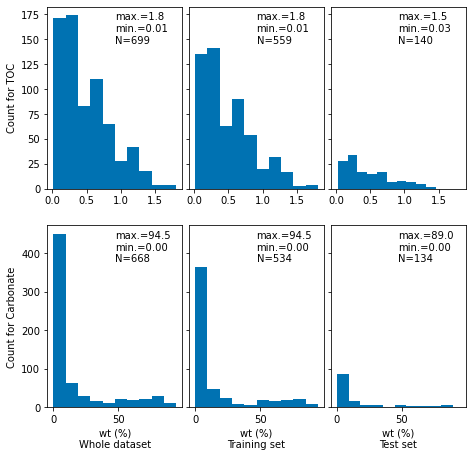

In [17]:
from sklearn.model_selection import train_test_split

fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
ca_df = merge_df[merge_df.core != 'SO178-12-3'] # This core doesn't have CaCO3 measurement

toc_y_train, toc_y_test = train_test_split(merge_df['TOC%'].values, test_size = 0.2, shuffle = True, random_state = 24)
ca_y_train, ca_y_test = train_test_split(ca_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)


    #ax.set_xlabel('wt (%)\n{}'.format(label))
    
for ax, y, label in zip(axes[0, :], [merge_df['TOC%'], toc_y_train, toc_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
for ax, y, label in zip(axes[1, :], [ca_df['CaCO3%'], ca_y_train, ca_y_test], ['Whole dataset', 'Training set', 'Test set']):
    ax.hist(y)
    ax.text(0.5, 0.8, "max.={:.1f}\nmin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')


fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_{}.png'.format(date))

In [19]:
np.unique(merge_df.core)

array(['LV28-44-3', 'LV29-114-3', 'SO178-12-3', 'SO264-13-2',
       'SO264-15-2', 'SO264-28-2', 'SO264-55-1', 'SO264-56-2',
       'SO264-64-1', 'SO264-66-2'], dtype=object)

In [18]:
merge_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,TC%,TOC%,CaCO3%,core,mid_depth_mm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.542079,0.394127,17.898887,SO264-64-1,115.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.247150,0.611208,13.632300,SO264-64-1,215.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.710588,0.523402,1.559822,SO264-64-1,305.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.562171,0.472551,0.746802,SO264-64-1,1015.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.578167,0.312852,2.210866,SO264-64-1,1815.0


## Show data distribution of each step

### Build datasets

In [7]:
merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
merge_df.core.unique()

array(['SO264-64-1', 'SO264-66-2', 'SO264-56-2', 'SO264-28-2',
       'SO264-55-1', 'SO264-15-2', 'SO264-13-2', 'LV28-44-3',
       'LV29-114-3', 'SO178-12-3'], dtype=object)

In [3]:
from sklearn.model_selection import train_test_split

#merge_df = pd.read_csv('data/spe+bulk_dataset_20201215.csv', index_col=0)
SO264_core = merge_df.core.unique()[:-3]
scale_1_df = merge_df[merge_df.core.isin(SO264_core)].copy()
scale_2_ca = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3']), 'CaCO3%']
scale_2_toc = merge_df.loc[merge_df.core.isin(['LV28-44-3', 'LV29-114-3', 'SO178-12-3']), 'TOC%']


s1_toc_train, s1_toc_test, s1_ca_train, s1_ca_test = train_test_split(scale_1_df['TOC%'].values, scale_1_df['CaCO3%'].values, test_size = 0.2, shuffle = True, random_state = 24)
s2_toc_train, s2_toc_test = train_test_split(scale_2_toc, test_size = 0.2, shuffle = True, random_state = 24)
s2_ca_train, s2_ca_test = train_test_split(scale_2_ca, test_size = 0.2, shuffle = True, random_state = 24)

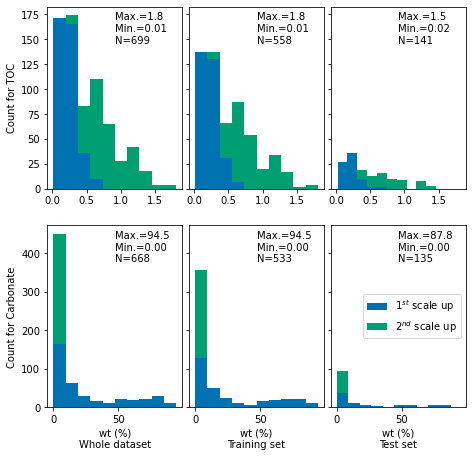

In [8]:
fig, axes = plt.subplots(2, 3, sharex='row', sharey='row', figsize=(7.5, 7))

# TOC    
for ax, s1, s2 in zip(axes[0, :], [scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                             [scale_2_toc, s2_toc_train, s2_toc_test]):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True)
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    
#Carbonate
for ax, s1, s2, label in zip(axes[1, :], [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test], 
                             [scale_2_ca, s2_ca_train, s2_ca_test], ['Whole dataset', 'Training set', 'Test set']):
    y = np.hstack((s1, s2))
    ax.hist([s1, s2], stacked=True, label=['1$^{st}$ scale up', '2$^{nd}$ scale up'])
    ax.text(0.5, 0.8, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)
    ax.set_xlabel('wt (%)\n{}'.format(label))

axes[0, 0].set_ylabel('Count for TOC')
axes[1, 0].set_ylabel('Count for Carbonate')
axes[1, 2].legend(loc='center right')

fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_s1+2_{}.png'.format(date))

In [9]:
s1_toc = {'max': [], 'min': [], 'N':[]}
s1_ca = {'max': [], 'min': [], 'N':[]}
s2_toc = {'max': [], 'min': [], 'N':[]}
s2_ca = {'max': [], 'min': [], 'N':[]}

cols = []

for s, label, values in zip([s1_toc, s1_ca, s2_toc, s2_ca], ['s1_toc', 's1_ca', 's2_toc', 's2_ca'], [[scale_1_df['TOC%'], s1_toc_train, s1_toc_test], 
                                                                                                     [scale_1_df['CaCO3%'], s1_ca_train, s1_ca_test],
                                                                                                     [scale_2_toc, s2_toc_train, s2_toc_test],
                                                                                                     [scale_2_ca, s2_ca_train, s2_ca_test]]):
    for value, dataset in zip(values, ['whole', 'train', 'test']):
        s['max'].append(np.max(value))
        s['min'].append(np.min(value))
        s['N'].append(len(value))
        cols.append('{}_{}'.format(label, dataset))

In [10]:
data_info = pd.concat(
    [pd.DataFrame(s1_toc).T, pd.DataFrame(s1_ca).T, pd.DataFrame(s2_toc).T, pd.DataFrame(s2_ca).T],
     join='outer', axis=1
)
data_info.columns = cols
data_info

,s1_toc_whole,s1_toc_train,s1_toc_test,s1_ca_whole,s1_ca_train,s1_ca_test,s2_toc_whole,s2_toc_train,s2_toc_test,s2_ca_whole,s2_ca_train,s2_ca_test
max,0.715612,0.715612,0.663723,94.487199,94.487199,87.822175,1.8085,1.8085,1.4635,7.77,7.77,4.49982
min,0.014449,0.014449,0.023633,0.009081,0.009081,0.090807,0.3130,0.3130,0.3425,0.00,0.00,0.00000
N,382.000000,305.000000,77.000000,382.000000,305.000000,77.000000,317.0000,253.0000,64.0000,286.00,228.00,58.00000


In [23]:
data_info.to_csv('results/data_distribution_{}.csv'.format(date))

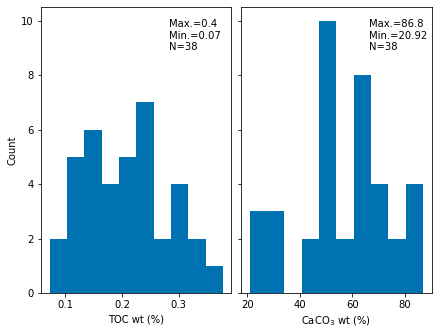

In [12]:
fig, axes =  plt.subplots(1, 2, figsize=(7, 5), sharey='row')

for ax, analyte in zip(axes, ['TOC%', 'CaCO3%']):
    y = merge_df.loc[merge_df.core == 'SO264-15-2', analyte]
    ax.hist(y)
    ax.text(0.67, 0.85, "Max.={:.1f}\nMin.={:.2f}\nN={}".format(
        np.max(y), np.min(y), len(y)), transform=ax.transAxes)


axes[0].set_xlabel('TOC wt (%)')
axes[1].set_xlabel('CaCO$_{3}$ wt (%)')
axes[0].set_ylabel('Count')
fig.subplots_adjust(wspace=.05, top=.92)
fig.savefig('results/data_hist_pilot_{}.png'.format(date))

# The performance in the test set
It's for the results of the 1st scale up.

In [2]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201013.joblib')
model_toc = load('models/toc_nmf+svr_model_20201013.joblib')

In [10]:
from sklearn.model_selection import train_test_split
merge_df = pd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].values
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df['CaCO3%'].values
y_toc = merge_df['TOC%'].values

X_train, X_test, y_ca_train, y_ca_test, y_toc_train, y_toc_test = train_test_split(X, y_ca, y_toc, test_size = 0.2, shuffle = True, random_state = 24)

In [11]:
y_ca_predict = np.exp(model_ca.predict(X_test))
y_toc_predict = np.exp(model_toc.predict(X_test))

In [9]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_ca_test, y_ca_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_ca_test, y_ca_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_ca_test, y_ca_predict)))

Scores in the test set:
R2 = 0.894 .
The mean absolute error is 4.731 (%, concetration).
The max. residual error is 50.121 (%, concetration).


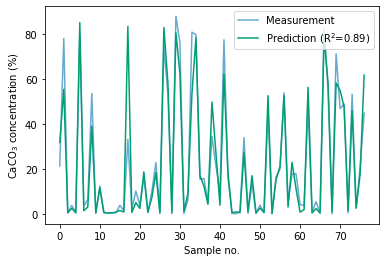

In [14]:
plt.plot(range(len(y_ca_predict)), y_ca_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('CaCO$_3$ concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/caco3_predictions_nmr+svr_{}.png'.format(date))

The performance is not consist with that in build_models_04.ipynb...

In [4]:
from dask.distributed import Client
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(
    project="aslee@10.110.16.5",
    queue='main',
    cores=40, 
    memory='10 GB',
    walltime="00:10:00",
    log_directory='job_logs'
)

In [5]:
client = Client(cluster)
cluster.scale(10)
#cluster.adapt(maximum=100)

In [6]:
client

Client Scheduler: tcp://10.110.10.28:34979 Dashboard: http://10.110.10.28:8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


In [27]:
client.close()
cluster.close()

In [7]:
from dask_ml.model_selection import train_test_split
import dask.dataframe as dd

merge_df = dd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].to_dask_array(lengths=True)
X = X / X.sum(axis = 1, keepdims = True)
y = merge_df['CaCO3%'].to_dask_array(lengths=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

In [20]:
y_predict = np.exp(model_ca.predict(X_test))

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_test, y_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_test, y_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_test, y_predict)))

Scores in the test set:
R2 = 0.902 .
The mean absolute error is 6.198 (%, concetration).
The max. residual error is 37.643 (%, concetration).


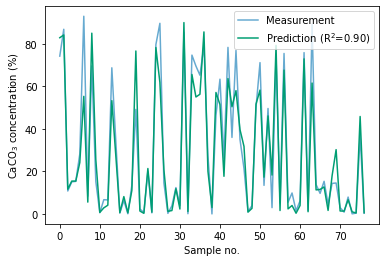

In [25]:
plt.plot(range(len(y_predict)), y_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_predict)), y_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_test, y_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('CaCO$_3$ concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/caco3_predictions_nmr+svr_{}.png'.format(date))

After some tryouts above, I realized train_test_split in dask_ml and sklearn produce different subsets although the random_state is setted same. In order to be consist with build_models_04.ipynb (having same subsets) and avoid data-snooping, I need to use dask here in the 1st scale up. Later in the 2nd scale it's nont needed because the works were submitted using scripts.

In [3]:
from dask_ml.model_selection import train_test_split
import dask.dataframe as dd

merge_df = dd.read_csv('data/spe+bulk_dataset_20201008.csv')
X = merge_df.iloc[:, 1: -5].to_dask_array(lengths=True)
X = X / X.sum(axis = 1, keepdims = True)
y_ca = merge_df['CaCO3%'].to_dask_array(lengths=True)
y_toc = merge_df['TOC%'].to_dask_array(lengths=True)

X_train, X_test, y_ca_train, y_ca_test, y_toc_train, y_toc_test = train_test_split(X, y_ca, y_toc, test_size = 0.2, shuffle = True, random_state = 24)

In [11]:
from joblib import load
model_ca = load('models/caco3_nmf+svr_model_20201013.joblib')
model_toc = load('models/toc_nmf+svr_model_20201013.joblib')

In [8]:
y_ca_predict = np.exp(model_ca.predict(X_test))
y_toc_predict = np.exp(model_toc.predict(X_test))

# change to np.array from dask array, which is easier for later fune-tuning plot
y_ca_test = np.array(y_ca_test)
y_toc_test = np.array(y_toc_test)

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error

print('Scores in the test set:')
print('R2 = {:.3f} .'.format(r2_score(y_toc_test, y_toc_predict)))
print('The mean absolute error is {:.3f} (%, concetration).'.format(mean_absolute_error(y_toc_test, y_toc_predict)))
print('The max. residual error is {:.3f} (%, concetration).'.format(max_error(y_toc_test, y_toc_predict)))

Scores in the test set:
R2 = 0.557 .
The mean absolute error is 0.057 (%, concetration).
The max. residual error is 0.435 (%, concetration).


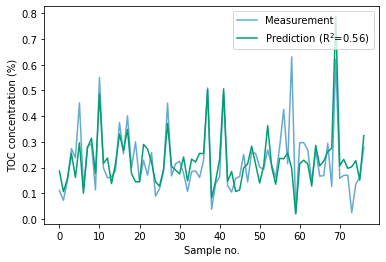

In [15]:
plt.plot(range(len(y_toc_predict)), y_toc_test, alpha=0.6, label='Measurement')
plt.plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction (R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
#plt.text(12, -7, r'R$^2$={:.2f}, mean ab. error={:.2f}, max. ab. error={:.2f}'.format(grid.best_score_, mean_absolute_error(y_ttest, y_predict), max_error(y_ttest, y_predict)))
plt.ylabel('TOC concentration (%)')
plt.xlabel('Sample no.')
plt.legend(loc = 'upper right')
#plt.savefig('results/toc_predictions_nmr+svr_{}.png'.format(date))

Just for double check. The TOC's performance is consistent to build_models_05.ipynb.

### Plot A

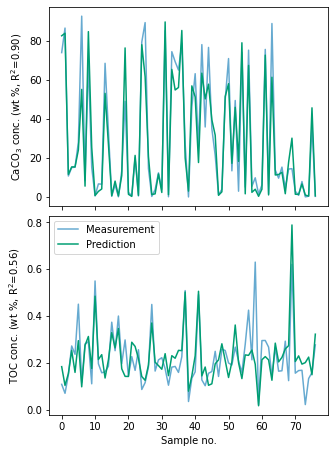

In [47]:
from sklearn.metrics import r2_score

fig, axes = plt.subplots(2, 1, figsize=(5, 7.5), sharex='col')
axes[0].plot(range(len(y_ca_test)), y_ca_test, alpha=0.6, label='Measurement')
axes[0].plot(range(len(y_ca_predict)), y_ca_predict, label='Prediction')
axes[0].set_ylabel('CaCO$_3$ conc. (wt %, R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
                   
axes[1].plot(range(len(y_toc_test)), y_toc_test, alpha=0.6, label='Measurement')
axes[1].plot(range(len(y_toc_predict)), y_toc_predict, label='Prediction')
axes[1].set_ylabel('TOC conc. (wt %, R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
axes[1].legend(loc='upper left')
axes[1].set_yticks(np.linspace(0, 0.8, 5))

axes[1].set_xlabel('Sample no.')
fig.subplots_adjust(hspace=.05)
fig.savefig('results/1st_performance_test_a_{}.png'.format(date))

### Plot B

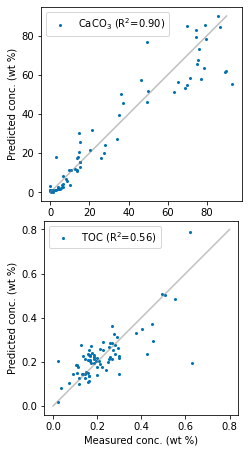

In [42]:
fig, axes = plt.subplots(2, 1, figsize=(5, 7.5))

ind = np.argsort(y_ca_test)
axes[0].scatter(y_ca_test[ind], y_ca_predict[ind], s=4, label='CaCO$_3$ (R$^2$={:.2f})'.format(r2_score(y_ca_test, y_ca_predict)))
axes[0].plot(np.linspace(0, 90, 10), np.linspace(0, 90, 10), alpha=.5, c='gray')
axes[0].set_ylabel('Predicted conc. (wt %)')
axes[0].legend(loc = 'upper left')
axes[0].set_aspect('equal')

ind = np.argsort(y_toc_test)
axes[1].scatter(y_toc_test[ind], y_toc_predict[ind], s=4, label='TOC (R$^2$={:.2f})'.format(r2_score(y_toc_test, y_toc_predict)))
axes[1].plot(np.linspace(0, 0.8, 9), np.linspace(0, 0.8, 9), alpha=.5, c='gray')
axes[1].set_ylabel('Predicted conc. (wt %)')
axes[1].set_xlabel('Measured conc. (wt %)')
axes[1].legend(loc = 'upper left')
axes[1].set_aspect('equal')
axes[1].set_yticks(np.linspace(0, 0.8, 5))

fig.subplots_adjust(hspace=.1)
fig.savefig('results/1st_performance_test_b_{}.png'.format(date))

### Choose plot
Two plots use the same data (performance in the test set) but different illustrations. Both are used to demonstrate performance of predicetions commonly. Plot A provides the comparison of sample behaviors in different analytes since the x-axis are the sample number. It shows that, samples having bad predictions in TOC don't necessary have bad prediction in carbonate. Also, it looks subjectively better in accuracy. Plot B display the error distribution along concentration more directly, but loose the ability of making comparison in samples between analytes. I prefer plot A becuase the relation of error and concentration is not clear in our result, making the advantage of plot B less important. 